<a href="https://colab.research.google.com/github/Regina-Arthur/YOLOv1_From_Scratch/blob/main/YOLOv1_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a YOLOv1 model from scratch by Regina Arthur


###This will be done without the convolutional layers being pretrained on imagenet

##Import the necessary libraries


In [ ]:
#Let's import the necessary libraries to build YOLOv1
#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms.v2 as v2
from torchvision.datasets import VOCDetection
from torch.utils.data import Dataset, DataLoader

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#numpy
import numpy as np

#python
from collections import Counter

#tqdm
from tqdm import tqdm

##Connect To a GPU if available

In [ ]:
#Let's check if cuda is available. Connect to it if it is not available.
#If it is not available, use cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

##Neural Network Architecture


###I am following the documentation on the MODULE class to build my neural network. All neural network model are to inherit from the nn.Module class.

####Conv2d
####class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

####class torch.nn.LeakyReLU(negative_slope=0.01, inplace=False)

####MaxPool2d
####class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)[source]

####Linear
####class torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)[source]

####Dropout2d
####class torch.nn.Dropout2d(p=0.5, inplace=False)[source]



In [ ]:
class YOLOv1(nn.Module):
  def __init__(self, S=7, B=2, C=20):
    #This runs the parent class (nn.Module) __init__() so the model can register layers and parameters properly
    super().__init__()
    #These represents the attributes that will be initialized for every instance of this class that you create
    self.conv1 = nn.Conv2d(in_channels = 3,out_channels = 64, kernel_size = 7,stride = 2, padding = 3)
    self.conv2 = nn.Conv2d(in_channels = 64,out_channels = 192, kernel_size = 3, stride = 1, padding = 1)
    self.conv3 = nn.Conv2d(in_channels = 192,out_channels = 128, kernel_size = 1,stride = 1, padding = 0)
    self.conv4 = nn.Conv2d(in_channels = 128,out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
    self.conv5 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 1, stride = 1, padding = 0)
    self.conv6 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 1)
    self.conv7 = nn.Conv2d(in_channels = 512, out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv8 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3, stride = 1, padding = 1)
    self.conv9 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv10 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding =1)
    self.conv11 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv12 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding = 1)
    self.conv13 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv14 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding = 1)
    self.conv15 = nn.Conv2d(in_channels = 512,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv16 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv17 = nn.Conv2d(in_channels = 1024,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv18 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv19 = nn.Conv2d(in_channels = 1024,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv20 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv21 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv22 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 2, padding = 1)
    self.conv23 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv24 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)

    #Pooling and Activation
    self.MaxPooling2d = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.LeakyReLU = nn.LeakyReLU(negative_slope = 0.1)

    #Flattening and Fully Connected Layer
    self.Flatten = nn.Flatten()
    self.Linear = nn.Linear(in_features = 50176 , out_features = 4096)
    self.Dropout = nn.Dropout(0.5)
    self.Linear2 = nn.Linear(in_features =4096 , out_features = S * S * ( B * 5 + C))


  #This defines how input data flows through the layers of the model during the forward pass
  def forward(self, x):
    x = self.MaxPooling2d(self.LeakyReLU(self.conv1(x)))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv2(x)))
    x = self.LeakyReLU(self.conv3(x))
    x = self.LeakyReLU(self.conv4(x))
    x = self.LeakyReLU(self.conv5(x))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv6(x)))
    x = self.LeakyReLU(self.conv7(x))
    x = self.LeakyReLU(self.conv8(x))
    x = self.LeakyReLU(self.conv9(x))
    x = self.LeakyReLU(self.conv10(x))
    x = self.LeakyReLU(self.conv11(x))
    x = self.LeakyReLU(self.conv12(x))
    x = self.LeakyReLU(self.conv13(x))
    x = self.LeakyReLU(self.conv14(x))
    x = self.LeakyReLU(self.conv15(x))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv16(x)))
    x = self.LeakyReLU(self.conv17(x))
    x = self.LeakyReLU(self.conv18(x))
    x = self.LeakyReLU(self.conv19(x))
    x = self.LeakyReLU(self.conv20(x))
    x = self.LeakyReLU(self.conv21(x))
    x = self.LeakyReLU(self.conv22(x))
    x = self.LeakyReLU(self.conv23(x))
    x = self.LeakyReLU(self.conv24(x))
    x = self.LeakyReLU(self.Linear(self.Flatten(x)))
    x = self.Dropout(x)
    x = self.Linear2(x)
    return x



## Architecture Test
This just makes sure the architecture works as intended


In [ ]:
# model = YOLOv1()
# model = model.to(device)

In [ ]:
# dummy_input = torch.randn(1, 3, 448, 448).to(device)

# with torch.no_grad():
#     output = model(dummy_input)

# print("Output shape:", output.shape)

Output shape: torch.Size([1, 1470])


/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
# total_params = sum(p.numel() for p in model.parameters())
# trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# print(f"Total params: {total_params:,}")
# print(f"Trainable params: {trainable_params:,}")

Total params: 271,703,550
Trainable params: 271,703,550


###Intersection Over Union

How we calculate the corner coordinates 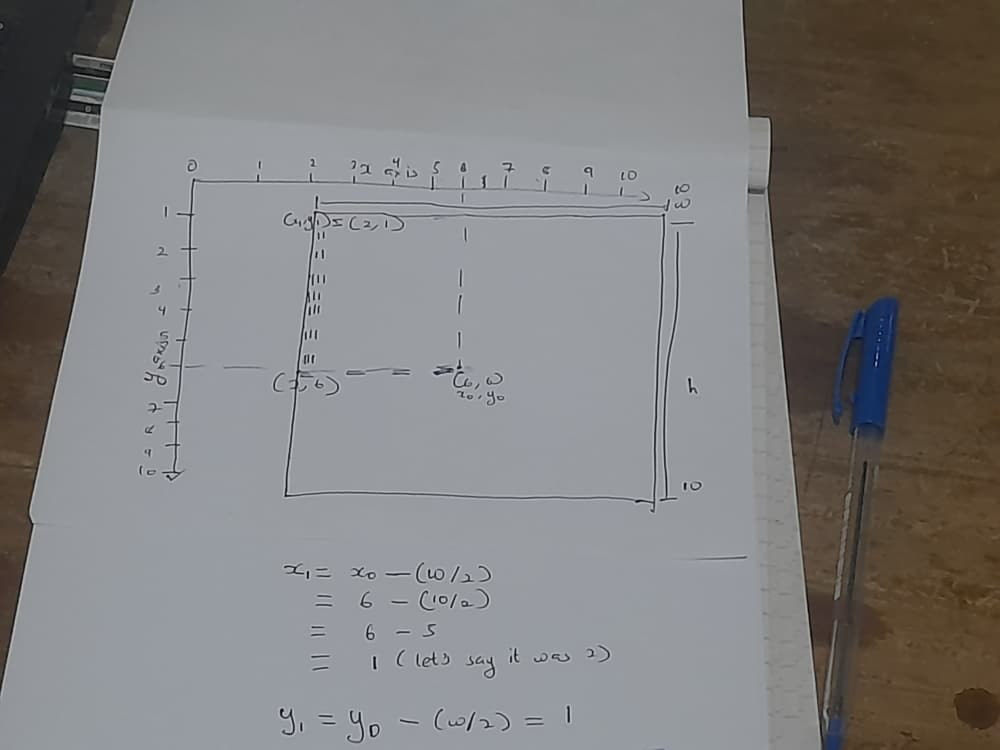


How to calculate the intersection

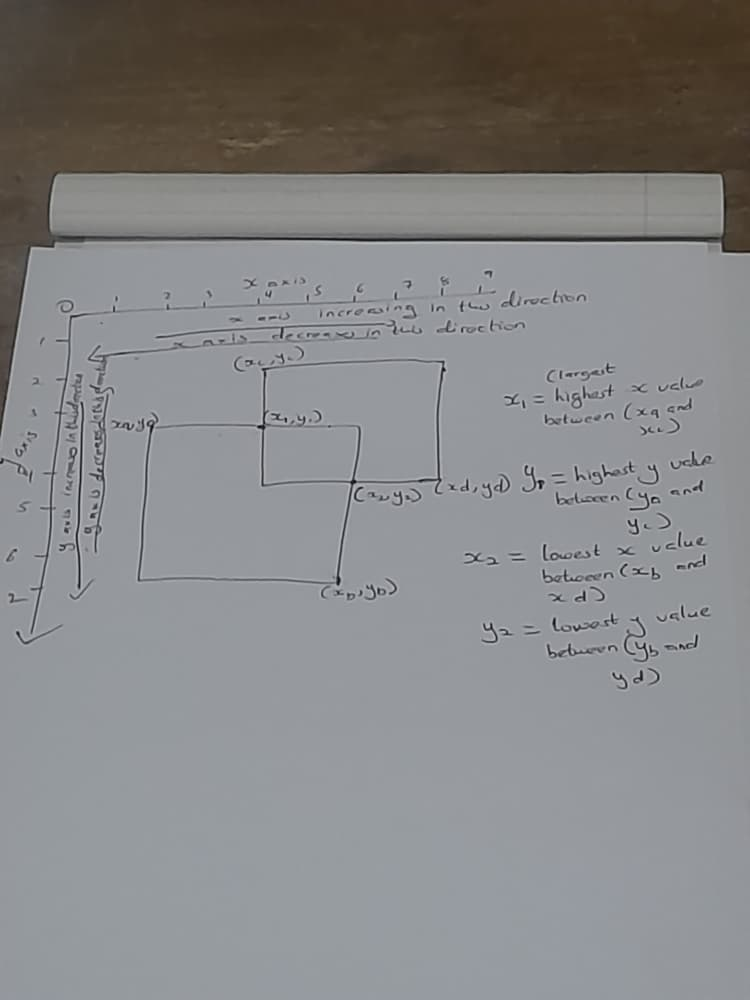


In [ ]:
def intersection_over_union(boxes_preds, boxes_labels):
  ''' The intersection_over_union is passed two one dimensional tensors ([x,y,w,h]),
      one for predictions and the other for the ground truth.
      It uses pytorch slicing to get the coordinates it needs for its calculations.
      [..., 0:1] for x coordinate
      [..., 1:2] for y coordinate
      [..., 2:3] for width
      [..., 3:4] for height

      the ... basically means all the other dimensions.
      the value before ':' is the start index and the value after ':' is the end index (end index - 1)
      so it basically return a sign value in this case.

  '''
  #Calculating the corner values based on the centers and the width and height
  #for the x coordinate of the upper left corner we subtract half of the width from x coordinate of center.
  #N/B due to order of operation we do not need to put these aspects (boxes_preds[..., 2:3] / 2 ) in bracket
  box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
  #for the y coordinate of the upper left corner we subtract half of the height from y coordinate of center.
  box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
  #for the x coordinate of the lower right corner we add half of the width from x coordinate of center.
  box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
  #for the y coordinate of the lower right corner we add half of the height from y coordinate of center.
  box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
  #for the x coordinate of the upper left corner we subtract half of the width from x coordinate of center.
  box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
  #for the y coordinate of the upper left corner we subtract half of the height from y coordinate of center.
  box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
  #for the x coordinate of the lower right corner we add half of the width from x coordinate of center.
  box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
  #for the y coordinate of the lower right corner we add half of the height from y coordinate of center.
  box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2


  #calculate the coordinates of the intersection
  x1 = torch.max(box1_x1, box2_x1) #Picks the largest values
  y1 = torch.max(box1_y1, box2_y1) #Picks the largest values
  x2 = torch.min(box1_x2, box2_x2) #Picks the smallest values
  y2 = torch.min(box1_y2, box2_y2) #Picks the smallest values

  #area is length*breadth
  #we do the subtraction to get the various lengths and breadths
  #when the calculated length or breadth is negative it means there is no intersection
  #N/B due to order of operation we do need to put so operations in bracket
  intersection_area = (x2 - x1).clamp(0) * (y2 - y1).clamp(0) #the .clamp(0) set all values below 0 to 0
  box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))  #abs() ensures we only have positive areas
  box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

  #we subtract an intersection because we have the intersection added twice when we do box1_area + box2_area
  union_area = box1_area + box2_area - intersection_area
  iou = intersection_area / (union_area + 1e-6) # It is (union_area + 1e-6) because union_area can be 0
  #something divided by 0 is undefined so 1e-6(0.000001) will ensure we get a number that is approximately 0.

  return iou

###Nonmax Suppression

In [ ]:
def nms(bboxes, iou_threshold, threshold, box_format="corners"):
  assert type(bboxes) == list

  bboxes = [box for box in bboxes if box[1] > threshold]
  bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
  bboxes_after_nms = []

  while bboxes:
      chosen_box = bboxes.pop(0)

      bboxes = [
          box
          for box in bboxes
          if box[0] != chosen_box[0]
          or intersection_over_union(
              torch.tensor(chosen_box[2:]),
              torch.tensor(box[2:]),
              box_format=box_format,
          )
          < iou_threshold
      ]

      bboxes_after_nms.append(chosen_box)

  return bboxes_after_nms

In [ ]:
def mean_average_precision(pred_boxes, true_boxes,
                           iou_threshold=0.5,
                           box_format="midpoint",
                           num_classes=20
                           ):
  # list storing all AP for respective classes
  average_precisions = []

  # used for numerical stability later on
  epsilon = 1e-6

  for c in range(num_classes):
      detections = []
      ground_truths = []

      # Go through all predictions and targets,
      # and only add the ones that belong to the
      # current class c
      for detection in pred_boxes:
          if detection[1] == c:
              detections.append(detection)

      for true_box in true_boxes:
          if true_box[1] == c:
              ground_truths.append(true_box)

      # find the amount of bboxes for each training example
      # Counter here finds how many ground truth bboxes we get
      # for each training example, so let's say img 0 has 3,
      # img 1 has 5 then we will obtain a dictionary with:
      # amount_bboxes = {0:3, 1:5}
      amount_bboxes = Counter([gt[0] for gt in ground_truths])

      # We then go through each key, val in this dictionary
      # and convert to the following (w.r.t same example):
      # ammount_bboxes = {0:torch.tensor[0,0,0], 1:torch.tensor[0,0,0,0,0]}
      for key, val in amount_bboxes.items():
          amount_bboxes[key] = torch.zeros(val)

      # sort by box probabilities which is index 2
      detections.sort(key=lambda x: x[2], reverse=True)
      TP = torch.zeros((len(detections)))
      FP = torch.zeros((len(detections)))
      total_true_bboxes = len(ground_truths)

      # If none exists for this class then we can safely skip
      if total_true_bboxes == 0:
          continue

      for detection_idx, detection in enumerate(detections):
          # Only take out the ground_truths that have the same
          # training idx as detection
          ground_truth_img = [
              bbox for bbox in ground_truths if bbox[0] == detection[0]
          ]

          num_gts = len(ground_truth_img)
          best_iou = 0

          for idx, gt in enumerate(ground_truth_img):
              iou = intersection_over_union(
                  torch.tensor(detection[3:]),
                  torch.tensor(gt[3:]),
                  box_format=box_format,
              )

              if iou > best_iou:
                  best_iou = iou
                  best_gt_idx = idx

          if best_iou > iou_threshold:
              # only detect ground truth detection once
              if amount_bboxes[detection[0]][best_gt_idx] == 0:
                  # true positive and add this bounding box to seen
                  TP[detection_idx] = 1
                  amount_bboxes[detection[0]][best_gt_idx] = 1
              else:
                  FP[detection_idx] = 1

          # if IOU is lower then the detection is a false positive
          else:
              FP[detection_idx] = 1

      TP_cumsum = torch.cumsum(TP, dim=0)
      FP_cumsum = torch.cumsum(FP, dim=0)
      recalls = TP_cumsum / (total_true_bboxes + epsilon)
      precisions = TP_cumsum / (TP_cumsum + FP_cumsum + epsilon)
      precisions = torch.cat((torch.tensor([1]), precisions))
      recalls = torch.cat((torch.tensor([0]), recalls))
      # torch.trapz for numerical integration
      average_precisions.append(torch.trapz(precisions, recalls))

  return sum(average_precisions) / len(average_precisions)


##Model loss
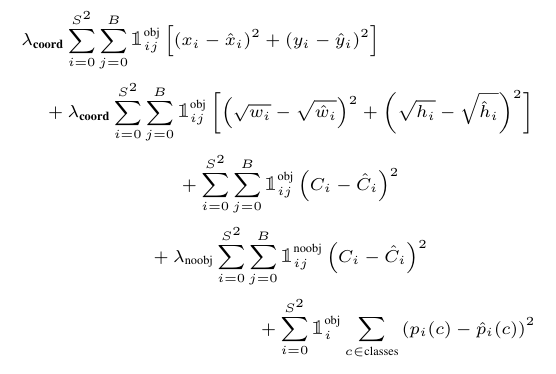

In [ ]:
class YOLOv1Loss(nn.Module):
  def __init__(self, S=7, B=2, C=20, λ_coord=5, λ_noobj=0.5):
    super().__init__()
    self.S = S
    self.B = B
    self.C = C
    self.lambda_coord = λ_coord
    self.lambda_noobj = λ_noobj
    self.mse = nn.MSELoss(reduction="sum")

  def forward(self, predictions, target):
    # predictions are shaped (BATCH_SIZE, S*S(C+B*5) when inputted
    predictions = predictions.reshape(-1, self.S, self.S, self.C + self.B * 5)

    # Calculate IoU for the two predicted bounding boxes with target bbox
    iou_b1 = intersection_over_union(predictions[..., 21:25], target[..., 21:25])
    iou_b2 = intersection_over_union(predictions[..., 26:30], target[..., 21:25])
    ious = torch.cat([iou_b1.unsqueeze(0), iou_b2.unsqueeze(0)], dim=0)

    # Take the box with highest IoU out of the two prediction
    # Note that bestbox will be indices of 0, 1 for which bbox was best
    iou_maxes, bestbox = torch.max(ious, dim=0)
    exists_box = target[..., 20].unsqueeze(3)  # in paper this is Iobj_i

    # ======================== #
    #   FOR BOX COORDINATES    #
    # ======================== #

    # Set boxes with no object in them to 0. We only take out one of the two
    # predictions, which is the one with highest Iou calculated previously.
    box_predictions = exists_box * (
        (
            bestbox * predictions[..., 26:30]
            + (1 - bestbox) * predictions[..., 21:25]
        )
    )

    box_targets = exists_box * target[..., 21:25]

    # Take sqrt of width, height of boxes to ensure that
    box_predictions[..., 2:4] = torch.sign(box_predictions[..., 2:4]) * torch.sqrt(
        torch.abs(box_predictions[..., 2:4] + 1e-6)
    )
    box_targets[..., 2:4] = torch.sqrt(box_targets[..., 2:4])

    box_loss = self.mse(
        torch.flatten(box_predictions, end_dim=-2),
        torch.flatten(box_targets, end_dim=-2),
    )

    # ==================== #
    #   FOR OBJECT LOSS    #
    # ==================== #

    # pred_box is the confidence score for the bbox with highest IoU
    pred_box = (
        bestbox * predictions[..., 25:26] + (1 - bestbox) * predictions[..., 20:21]
    )

    object_loss = self.mse(
        torch.flatten(exists_box * pred_box),
        torch.flatten(exists_box * target[..., 20:21]),
    )

    # ======================= #
    #   FOR NO OBJECT LOSS    #
    # ======================= #

    #max_no_obj = torch.max(predictions[..., 20:21], predictions[..., 25:26])
    #no_object_loss = self.mse(
    #    torch.flatten((1 - exists_box) * max_no_obj, start_dim=1),
    #    torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1),
    #)

    no_object_loss = self.mse(
        torch.flatten((1 - exists_box) * predictions[..., 20:21], start_dim=1),
        torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1),
    )

    no_object_loss += self.mse(
        torch.flatten((1 - exists_box) * predictions[..., 25:26], start_dim=1),
        torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1)
    )

    # ================== #
    #   FOR CLASS LOSS   #
    # ================== #

    class_loss = self.mse(
        torch.flatten(exists_box * predictions[..., :20], end_dim=-2,),
        torch.flatten(exists_box * target[..., :20], end_dim=-2,),
    )

    loss = (
        self.lambda_coord * box_loss  # first two rows in paper
        + object_loss  # third row in paper
        + self.lambda_noobj * no_object_loss  # forth row
        + class_loss  # fifth row
    )

    return loss


##Load the Pascal Visual Object Class Dataset

In [ ]:
torch.manual_seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define VOC classes
VOC_CLASSES = [
    "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]
CLASS2IDX = {cls: i for i, cls in enumerate(VOC_CLASSES)}

# Custom dataset wrapper
class CleanedVOCDataset(VOCDetection):
    def __init__(self, root, year, image_set, transforms=None):
        super().__init__(root, year=year, image_set=image_set, download=False)
        self.transforms = transforms

    def __getitem__(self, idx):
        img, target = super().__getitem__(idx)
        _, h, w = img.shape

        objects = target["annotation"]["object"]
        if not isinstance(objects, list):
            objects = [objects]

        boxes = []
        for obj in objects:
            name = obj["name"].lower().strip()
            if name not in CLASS2IDX:
                continue  # skip unknown labels
            class_id = CLASS2IDX[name]

            bbox = obj["bndbox"]
            xmin, ymin = int(bbox["xmin"]), int(bbox["ymin"])
            xmax, ymax = int(bbox["xmax"]), int(bbox["ymax"])

            # convert to YOLO format (normalized)
            x_center = ((xmin + xmax) / 2) / w
            y_center = ((ymin + ymax) / 2) / h
            bw = (xmax - xmin) / w
            bh = (ymax - ymin) / h

            boxes.append([class_id, x_center, y_center, bw, bh])

        boxes = torch.tensor(boxes, dtype=torch.float32)

        if self.transforms:
            img = self.transforms(img)

        return img, boxes  # <-- target is tensor now

# Collate function for variable targets
def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)

# Transforms (your pipeline)
transforms = v2.Compose([
    v2.ToImage(),
    v2.ColorJitter(brightness=1.5, contrast=1.5, saturation=1.5),
    v2.RandomHorizontalFlip(p=0.2),
    v2.RandomVerticalFlip(p=0.2),
    v2.Resize((448,448)),
    v2.ToDtype(torch.float32, scale=True),
])

# Dataset
train_dataset = CleanedVOCDataset(
    root='/content/drive/MyDrive/_Dataset/PASCALVOC2007_AND_2012',
    year='2007',
    image_set='train',
    transforms=transforms
)

# DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    collate_fn=collate_fn
)

# Dataset
test_dataset = CleanedVOCDataset(
    root='/content/drive/MyDrive/_Dataset/PASCALVOC2007_AND_2012',
    year='2007',
    image_set='val',
    transforms=transforms
)

# DataLoader
test_loader = DataLoader(
    test_dataset,
    batch_size=8,
    shuffle=True,
    collate_fn=collate_fn
)

###AdamW
class torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, *, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)


In [ ]:
def learning_rate(epoch, epochs):
  first_stop = 0.6 * epochs
  second_stop = 0.8 * epochs
  if epoch <= first_stop:
    return 0.1
  elif epoch <= second_stop:
    return 0.01
  else:
    return 0.001


num_epochs = 10

In [ ]:
def plot_image(image, boxes):
  """Plots predicted bounding boxes on the image"""
  im = np.array(image)
  height, width, _ = im.shape

  # Create figure and axes
  fig, ax = plt.subplots(1)
  # Display the image
  ax.imshow(im)

  # box[0] is x midpoint, box[2] is width
  # box[1] is y midpoint, box[3] is height

  # Create a Rectangle patch
  for box in boxes:
      box = box[2:]
      assert len(box) == 4, "Got more values than in x, y, w, h, in a box!"
      upper_left_x = box[0] - box[2] / 2
      upper_left_y = box[1] - box[3] / 2
      rect = patches.Rectangle(
          (upper_left_x * width, upper_left_y * height),
          box[2] * width,
          box[3] * height,
          linewidth=1,
          edgecolor="r",
          facecolor="none",
      )
      # Add the patch to the Axes
      ax.add_patch(rect)

  plt.show()

def get_bboxes(
    loader,
    model,
    iou_threshold,
    threshold,
    pred_format="cells",
    box_format="midpoint",
    device="cuda"):
  all_pred_boxes = []
  all_true_boxes = []

  # make sure model is in eval before get bboxes
  model.eval()
  train_idx = 0

  for batch_idx, (x, labels) in enumerate(loader):
      x = x.to(device)
      labels = labels.to(device)

      with torch.no_grad():
          predictions = model(x)

      batch_size = x.shape[0]
      true_bboxes = cellboxes_to_boxes(labels)
      bboxes = cellboxes_to_boxes(predictions)

      for idx in range(batch_size):
          nms_boxes = nms(
              bboxes[idx],
              iou_threshold=iou_threshold,
              threshold=threshold,
              box_format=box_format,
          )


          #if batch_idx == 0 and idx == 0:
          #    plot_image(x[idx].permute(1,2,0).to("cpu"), nms_boxes)
          #    print(nms_boxes)

          for nms_box in nms_boxes:
              all_pred_boxes.append([train_idx] + nms_box)

          for box in true_bboxes[idx]:
              # many will get converted to 0 pred
              if box[1] > threshold:
                  all_true_boxes.append([train_idx] + box)

          train_idx += 1

  model.train()
  return all_pred_boxes, all_true_boxes



def convert_cellboxes(predictions, S=7):
    """
    Converts bounding boxes output from Yolo with
    an image split size of S into entire image ratios
    rather than relative to cell ratios. Tried to do this
    vectorized, but this resulted in quite difficult to read
    code... Use as a black box? Or implement a more intuitive,
    using 2 for loops iterating range(S) and convert them one
    by one, resulting in a slower but more readable implementation.
    """

    predictions = predictions.to("cpu")
    batch_size = predictions.shape[0]
    predictions = predictions.reshape(batch_size, 7, 7, 30)
    bboxes1 = predictions[..., 21:25]
    bboxes2 = predictions[..., 26:30]
    scores = torch.cat(
        (predictions[..., 20].unsqueeze(0), predictions[..., 25].unsqueeze(0)), dim=0
    )
    best_box = scores.argmax(0).unsqueeze(-1)
    best_boxes = bboxes1 * (1 - best_box) + best_box * bboxes2
    cell_indices = torch.arange(7).repeat(batch_size, 7, 1).unsqueeze(-1)
    x = 1 / S * (best_boxes[..., :1] + cell_indices)
    y = 1 / S * (best_boxes[..., 1:2] + cell_indices.permute(0, 2, 1, 3))
    w_y = 1 / S * best_boxes[..., 2:4]
    converted_bboxes = torch.cat((x, y, w_y), dim=-1)
    predicted_class = predictions[..., :20].argmax(-1).unsqueeze(-1)
    best_confidence = torch.max(predictions[..., 20], predictions[..., 25]).unsqueeze(
        -1
    )
    converted_preds = torch.cat(
        (predicted_class, best_confidence, converted_bboxes), dim=-1
    )

    return converted_preds


def cellboxes_to_boxes(out, S=7):
    converted_pred = convert_cellboxes(out).reshape(out.shape[0], S * S, -1)
    converted_pred[..., 0] = converted_pred[..., 0].long()
    all_bboxes = []

    for ex_idx in range(out.shape[0]):
        bboxes = []

        for bbox_idx in range(S * S):
            bboxes.append([x.item() for x in converted_pred[ex_idx, bbox_idx, :]])
        all_bboxes.append(bboxes)

    return all_bboxes

def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)


def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

In [ ]:
def encode_targets(targets, S=7, C=20):
    """
    Convert list of [N, 5] targets -> YOLOv1 grid tensor [S, S, C+5]
    Each target row: [class, x, y, w, h]  (all normalized [0,1])
    """
    B = len(targets)  # batch size
    encoded = []

    for b in range(B):
        t = targets[b]  # shape [N, 5]
        grid = torch.zeros((S, S, C + 5))  # [7, 7, 25]

        for box in t:
            cls, x, y, w, h = box.tolist()

            # Find cell index for center (x,y)
            i = int(x * S)
            j = int(y * S)

            # Safety (clamp inside grid)
            i = min(S - 1, max(0, i))
            j = min(S - 1, max(0, j))

            # One-hot class
            grid[j, i, int(cls)] = 1.0  # NOTE: grid[y, x] convention

            # Objectness
            grid[j, i, C] = 1.0

            # Box coords (still normalized wrt image)
            grid[j, i, C+1:C+5] = torch.tensor([x, y, w, h])

        encoded.append(grid)

    return torch.stack(encoded)  # [B, S, S, C+5]


def train(train_loader, model, optimizer, criterion, device, S=7, C=20):
    loop = tqdm(train_loader, leave=True)
    mean_loss = []

    for batch_idx, (images, targets) in enumerate(loop):
        # Stack images into a batch tensor [B, 3, 448, 448]
        images = torch.stack(images).to(device)

        # Encode targets into YOLOv1 grid format
        targets = encode_targets([t.to(device) for t in targets], S=S, C=C).to(device)  # [B, S, S, 25]

        # Forward
        out = model(images)

        # Compute loss
        loss_val = criterion(out, targets)
        mean_loss.append(loss_val.item())

        # Backward
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Update progress bar
        loop.set_postfix(loss=loss_val.item())

    print(f"Mean loss was {sum(mean_loss)/len(mean_loss)}")


def test(test_loader, model, criterion, device, S=7, C=20):
    model.eval()  # set to evaluation mode
    loop = tqdm(test_loader, leave=True)
    mean_loss = []

    for batch_idx, (images, targets) in enumerate(loop):
        # Stack images into a batch tensor [B, 3, 448, 448]
        images = torch.stack(images).to(device)

        # Encode targets into YOLOv1 grid format
        targets = encode_targets([t.to(device) for t in targets], S=S, C=C).to(device)  # [B, S, S, 25]

        # Forward (no grad, eval mode)
        out = model(images)  # [B, S, S, 30]

        # Compute loss
        loss_val = criterion(out, targets)
        mean_loss.append(loss_val.item())

        # Update progress bar
        loop.set_postfix(loss=loss_val.item())

    avg_loss = sum(mean_loss) / len(mean_loss)
    print(f"Mean test loss was {avg_loss}")


num_epochs = 1

def main():
    model = YOLOv1().to(device)

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=0.001,   # 0.1 is too high, changed to a safer start
        betas=(0.9, 0.99),
        weight_decay=0.0005,
    )
    criterion = YOLOv1Loss()

    for epoch in range(num_epochs):
        print(f"Epoch [{epoch+1}/{num_epochs}]")

        # Training
        train(train_loader, model, optimizer, criterion, device)

        # Debug visualization (just first batch)
        for images, targets in train_loader:
            images = torch.stack(images).to(device)
            out = model(images)

            for idx in range(min(8, images.shape[0])):  # up to 8 images
                bboxes = cellboxes_to_boxes(out)
                bboxes = nms(
                    bboxes[idx],
                    iou_threshold=0.5,
                    threshold=0.4,
                    box_format="midpoint",
                )
                plot_image(images[idx].permute(1, 2, 0).cpu(), bboxes)

            import sys
            sys.exit()  # remove later

        # Evaluation
        pred_boxes, target_boxes = get_bboxes(
            train_loader, model, iou_threshold=0.5, threshold=0.4
        )

        mean_avg_prec = mean_average_precision(
            pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint"
        )
        print(f"Train mAP: {mean_avg_prec}")

        # Testing
        test(test_loader, model, criterion, device)

        # Debug visualization (just first batch)
        for images, targets in test_loader:
            images = torch.stack(images).to(device)
            out = model(images)

            for idx in range(min(8, images.shape[0])):  # up to 8 images
                bboxes = cellboxes_to_boxes(out)
                bboxes = nms(
                    bboxes[idx],
                    iou_threshold=0.5,
                    threshold=0.4,
                    box_format="midpoint",
                )
                plot_image(images[idx].permute(1, 2, 0).cpu(), bboxes)

            import sys
            sys.exit()  # remove later

        # Evaluation
        pred_boxes, target_boxes = get_bboxes(
            test_loader, model, iou_threshold=0.5, threshold=0.4
        )

        mean_avg_prec = mean_average_precision(
            pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint"
        )
        print(f"Test mAP: {mean_avg_prec}")

        # Save checkpoint
        if mean_avg_prec > 0.9:
            checkpoint = {
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
            }
            #save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE)
            import time
            time.sleep(10)



if __name__ == "__main__":
    main()

Epoch [1/1]


 56%|█████▌    | 176/313 [39:39<30:57, 13.56s/it, loss=7.55e+12]